# Multi-label Emotion Classification
Data is about emotion detection in Indonesian user comments.<br>
Source: [emotion_riza](https://dataturks.com/projects/rizki.fauzi/emotion_riza)<br>
*The JSON data has been converted to multi-label csv data

There are 8 labels in classifying the comments:
- trust
- fear
- surprise
- sadness
- disgust
- anger
- anticipation
- joy

Source:
- [emotion_riza dataset (in JSON)](https://dataturks.com/projects/rizki.fauzi/emotion_riza)
- ["NB-SVM strong linear baseline" kernel](https://www.kaggle.com/jhoward/nb-svm-strong-linear-baseline)

In [1]:
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

## Looking at The Data
The training data contains a row per comment, with the text of the comment and 8 different labels

In [21]:
train = pd.read_csv('../input/multi-label_emotion.csv')
train.head()

,text,trust,fear,surprise,sadness,disgust,anger,anticipation,joy
0,@04Nakula @jokowi @prabowo @Gerindra @Dailymot...,0,0,0,0,0,0,0,1
1,@Achmadr06327297 @fadlizon @Gerindra @prabowo ...,0,0,0,0,0,0,0,1
2,@Gerindra @PKSejahtera @prabowo Seandainya sek...,0,1,0,0,0,0,0,0
3,@fadlizon @Gerindra @prabowo Saya dukung pak p...,0,0,0,0,0,0,0,1
4,@Gerindra @PKSejahtera Mencari yang setia dan ...,1,0,0,0,0,0,0,0


In [20]:
train.describe()

,trust,fear,surprise,sadness,disgust,anger,anticipation,joy
count,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000,8690.000000
mean,0.216456,0.071922,0.010587,0.084925,0.063751,0.114845,0.167664,0.268124
std,0.411852,0.258373,0.102352,0.278786,0.244324,0.318853,0.373589,0.443008
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


133.1126582278481 199.1904592927695 2 5558


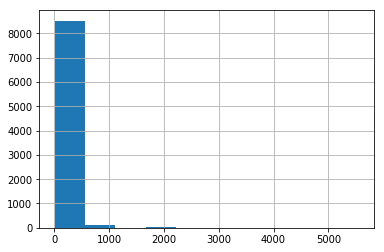

In [16]:
# The length of the comments
lens = train.text.str.len()
print(lens.mean(), lens.std(), lens.min(), lens.max())

lens.hist();

In [18]:
# See very short comment
train[train.text.str.len() < 5]

,text,trust,fear,surprise,sadness,disgust,anger,anticipation,joy
1140,LBP,0,0,0,0,0,0,0,0
1890,YES,0,0,0,0,0,0,0,1
2599,ayo,0,0,0,0,0,0,0,1
4566,Wow,0,0,1,0,0,0,0,0
4690,:(,0,0,0,1,0,0,0,0
4691,zonk,0,0,0,1,0,0,0,0
4692,Zonk,0,0,0,1,0,0,0,0
4697,Zonk,0,0,0,1,0,0,0,0
5009,siip,1,0,0,0,0,0,0,0
5040,Good,0,0,0,0,0,0,0,1


In [19]:
# See very long comment
train[train.text.str.len() > 5000]

,text,trust,fear,surprise,sadness,disgust,anger,anticipation,joy
5770,PERINGATAN HARI AIR SEDUNIA\n“HENTIKAN PRIVATI...,0,0,0,1,0,0,0,0
6703,Assalamu alaikum Wr. Wb.Saya sangat berterima ...,0,0,0,0,0,0,0,1
